### モデルに入力を設定してシミュレーションを行う。
[JModelica Users Guide - Version 2.10](https://jmodelica.org/downloads/UsersGuide-2.10.pdf) 5.3.2.1のシミュレーションを行います。これは、5.2の Van der Pol ossilator モデルに、制御信号 u としてに正弦波を入力します。


入力信号のオブジェクトを作成します。

In [1]:
import numpy as N
t = N.linspace(0.,10.,100)
u = N.sin(t)
u_traj = N.transpose(N.vstack((t,u)))
input_object = ('u', u_traj)

モデルの FMU は　VDP.ipynb で作成済みなので読み込みます。inputオプションを指定してシミュレーションを実行します。

In [2]:
from pyfmi import load_fmu
model = load_fmu("VDP.fmu")
res = model.simulate(final_time=10, input=input_object)

Final Run Statistics: --- 

 Number of steps                                 : 157
 Number of function evaluations                  : 207
 Number of Jacobian evaluations                  : 3
 Number of function eval. due to Jacobian eval.  : 6
 Number of error test failures                   : 9
 Number of nonlinear iterations                  : 203
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-06
 Tolerances (relative)    : 0.0001

Simulation interval    : 0.0 - 10.0 seconds.
Elapsed simulation time: 0.0156011581421 seconds.


シミュレーション結果を取得してプロットします。

<IPython.core.display.Javascript object>


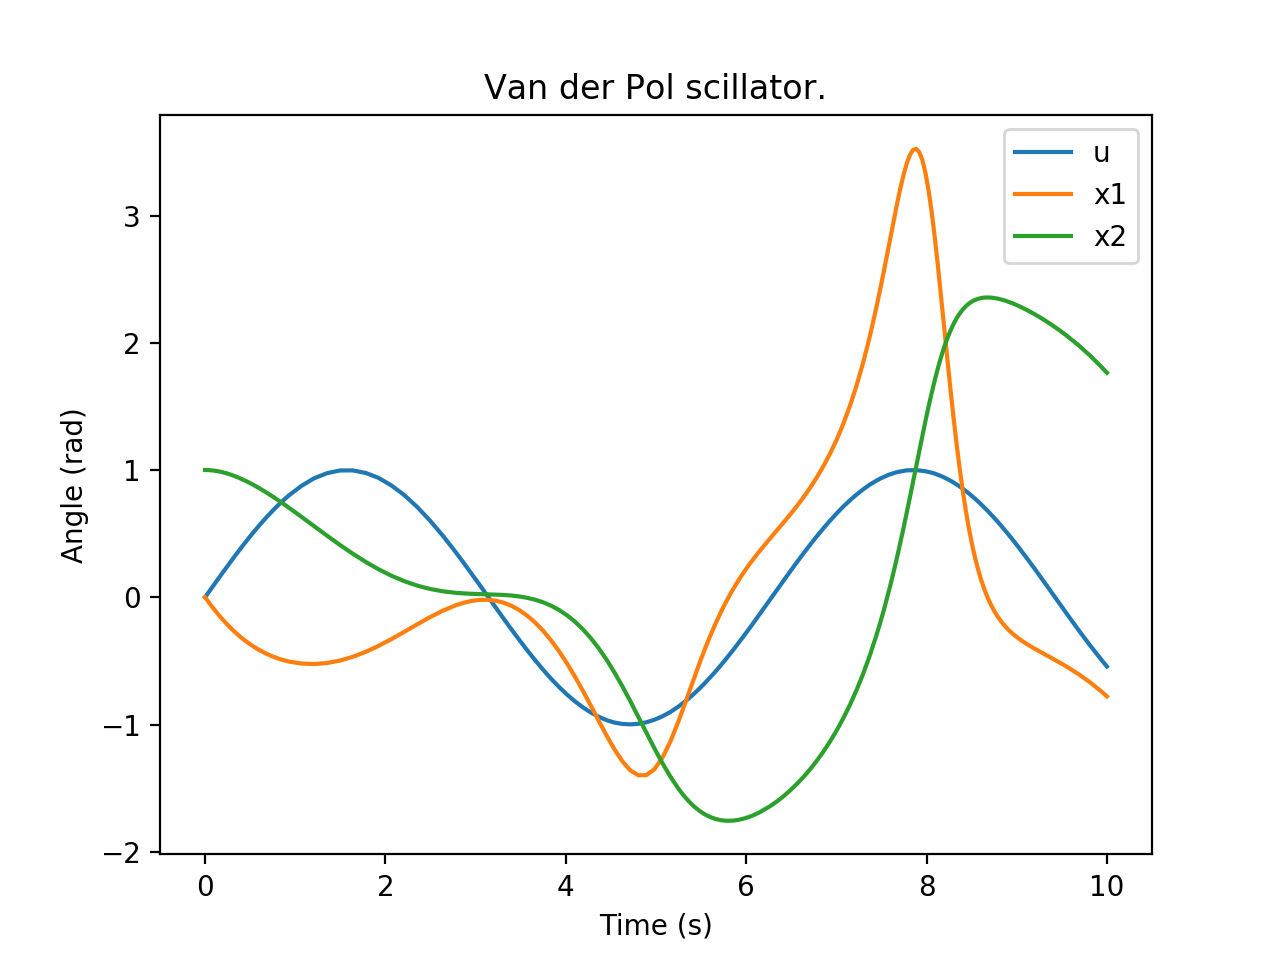

Text(0.5,0,u'Time (s)')

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
u = res['u']
x1 = res['x1']
x2 = res['x2']
t = res['time']

plt.figure(1)
plt.plot(t, u, t, x1, t, x2)
plt.legend(('u', 'x1', 'x2'))
plt.title('Van der Pol scillator.')
plt.ylabel('Angle (rad)')
plt.xlabel('Time (s)')